In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

print("pandas version:", pd.__version__)
print('numpy version:',  np.__version__)
print('matplotlib version:',  matplotlib.__version__)

pandas version: 0.24.1
numpy version: 1.16.5
matplotlib version: 3.1.3


## Base

In [2]:
mic_base = pd.read_csv('Mic_base_20201.csv',index_col=0)
mic_base.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Tax1,109.0,105.030045,102.687996,100.008510,98.168884,97.030570,96.55217,97.46144,99.173515,101.274100,...,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000
Tax2,102.0,100.581340,100.193245,99.839615,99.539474,98.306915,98.10828,97.94813,97.848340,97.780230,...,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000
Tax3,114.0,110.605100,107.994900,105.119736,103.206100,102.905630,103.24941,103.03032,104.570570,106.379730,...,111.13351,109.38491,107.19181,104.947,103.30071,101.02854,98.34061,96.345894,94.32673,92.75819
Tax4,95.0,94.151146,93.486650,93.024635,90.932740,91.067010,91.48466,92.11806,93.096830,94.259056,...,12770.66600,12746.31500,12730.19300,12701.504,12663.44200,12628.41300,12576.62500,12540.298000,12496.59500,12474.09300
Tax5,117.0,116.050090,115.208110,114.489845,113.967180,113.620186,113.45170,113.41825,113.602580,113.895195,...,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000


In [3]:
mic_base = mic_base/10000
mic_base.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Tax1,0.0109,0.010503,0.010269,0.010001,0.009817,0.009703,0.009655,0.009746,0.009917,0.010127,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax2,0.0102,0.010058,0.010019,0.009984,0.009954,0.009831,0.009811,0.009795,0.009785,0.009778,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax3,0.0114,0.011061,0.010799,0.010512,0.010321,0.010291,0.010325,0.010303,0.010457,0.010638,...,0.011113,0.010938,0.010719,0.010495,0.010330,0.010103,0.009834,0.009635,0.009433,0.009276
Tax4,0.0095,0.009415,0.009349,0.009302,0.009093,0.009107,0.009148,0.009212,0.009310,0.009426,...,1.277067,1.274632,1.273019,1.270150,1.266344,1.262841,1.257662,1.254030,1.249659,1.247409
Tax5,0.0117,0.011605,0.011521,0.011449,0.011397,0.011362,0.011345,0.011342,0.011360,0.011390,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


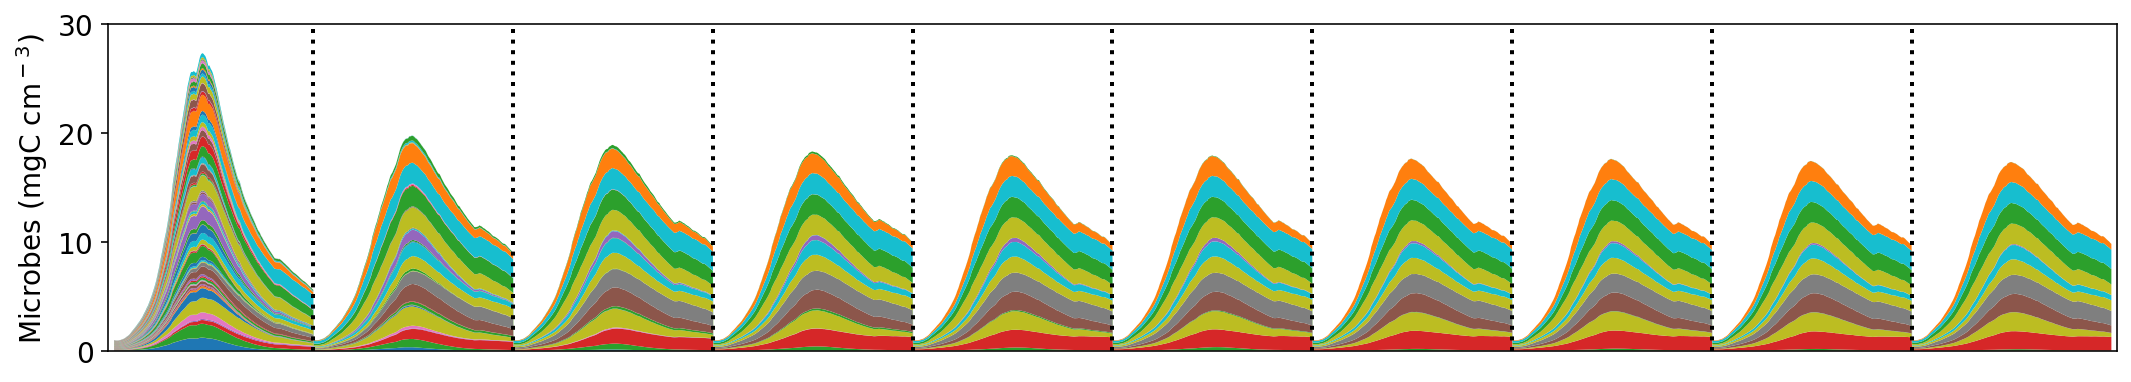

In [4]:
fig = plt.figure(figsize=(18,3))

ax1 = fig.add_subplot(111)

plt.tick_params(axis='both',labelsize=14,bottom=False,labelbottom=False)

plt.xlim(-10,365*10+10)
plt.ylim(0,30)
#plt.xlabel('Year',size=14)
plt.ylabel('Microbes (mgC cm$^-$$^3$)',size=14)

#plt.title('Base',size=14)  

plt.stackplot(range(1,365*10+1),mic_base.iloc[:,1:])

for i in range(9):
    if (i == 2) | (i==5):
        plt.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)
    else:
        plt.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)
        
        
#plt.savefig('microbes_base.pdf',bbox_inches='tight')

plt.show()

## Base x 2

In [5]:
mic_basex2 = pd.read_csv('Mic_basex2_20201.csv',index_col=0)
mic_basex2.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Tax1,109.0,105.030045,102.687996,100.008510,98.168884,97.030570,96.55217,97.46144,99.173515,101.274100,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Tax2,102.0,100.581340,100.193245,99.839615,99.539474,98.306915,98.10828,97.94813,97.848340,97.780230,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Tax3,114.0,110.605100,107.994900,105.119736,103.206100,102.905630,103.24941,103.03032,104.570570,106.379730,...,157.90015,155.20253,152.78159,149.99911,146.48807,144.07996,141.23367,138.38034,135.86804,133.63025
Tax4,95.0,94.151146,93.486650,93.024635,90.932740,91.067010,91.48466,92.11806,93.096830,94.259056,...,12947.21600,12921.70400,12903.44500,12876.42900,12857.04300,12838.73400,12795.93400,12768.24200,12749.29400,12734.16300
Tax5,117.0,116.050090,115.208110,114.489845,113.967180,113.620186,113.45170,113.41825,113.602580,113.895195,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [6]:
mic_basex2 = mic_basex2/10000
mic_basex2.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Tax1,0.0109,0.010503,0.010269,0.010001,0.009817,0.009703,0.009655,0.009746,0.009917,0.010127,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax2,0.0102,0.010058,0.010019,0.009984,0.009954,0.009831,0.009811,0.009795,0.009785,0.009778,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax3,0.0114,0.011061,0.010799,0.010512,0.010321,0.010291,0.010325,0.010303,0.010457,0.010638,...,0.015790,0.01552,0.015278,0.015000,0.014649,0.014408,0.014123,0.013838,0.013587,0.013363
Tax4,0.0095,0.009415,0.009349,0.009302,0.009093,0.009107,0.009148,0.009212,0.009310,0.009426,...,1.294722,1.29217,1.290345,1.287643,1.285704,1.283873,1.279593,1.276824,1.274929,1.273416
Tax5,0.0117,0.011605,0.011521,0.011449,0.011397,0.011362,0.011345,0.011342,0.011360,0.011390,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


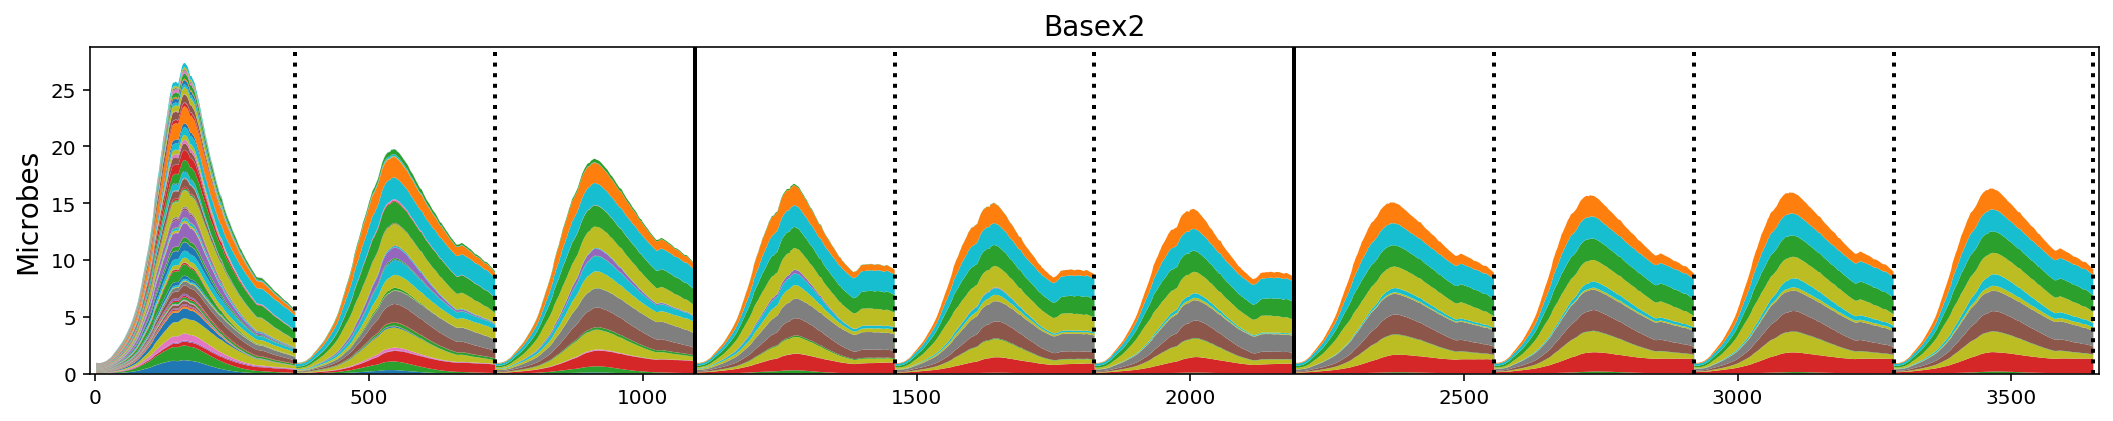

In [7]:
fig = plt.figure(figsize=(18,3))

ax1 = fig.add_subplot(111)
plt.ylabel('Microbes',size=14)
plt.xlim(-10,365*10+10)
plt.title('Basex2',size=14)  

plt.stackplot(range(1,365*10+1),mic_basex2.iloc[:,1:])

for i in range(10):
    if (i == 2) | (i==5):
        plt.axvline(x=365*(i+1),color='k',linestyle='-',lw=2)
    else:
        plt.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)

## basex4

In [8]:
mic_basex4 = pd.read_csv('Mic_basex4_20201.csv',index_col=0)
mic_basex4.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Tax1,109.0,105.030045,102.687996,100.008510,98.168884,97.030570,96.55217,97.46144,99.173515,101.274100,...,0.000,0.000,0.000,0.00,0.00,0.000,0.00,0.000,0.000,0.00
Tax2,102.0,100.581340,100.193245,99.839615,99.539474,98.306915,98.10828,97.94813,97.848340,97.780230,...,0.000,0.000,0.000,0.00,0.00,0.000,0.00,0.000,0.000,0.00
Tax3,114.0,110.605100,107.994900,105.119736,103.206100,102.905630,103.24941,103.03032,104.570570,106.379730,...,0.000,0.000,0.000,0.00,0.00,0.000,0.00,0.000,0.000,0.00
Tax4,95.0,94.151146,93.486650,93.024635,90.932740,91.067010,91.48466,92.11806,93.096830,94.259056,...,12510.434,12475.876,12460.583,12423.98,12409.32,12401.988,12368.14,12342.044,12320.467,12306.04
Tax5,117.0,116.050090,115.208110,114.489845,113.967180,113.620186,113.45170,113.41825,113.602580,113.895195,...,0.000,0.000,0.000,0.00,0.00,0.000,0.00,0.000,0.000,0.00


In [9]:
mic_basex4 = mic_basex4/10000
mic_basex4.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Tax1,0.0109,0.010503,0.010269,0.010001,0.009817,0.009703,0.009655,0.009746,0.009917,0.010127,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax2,0.0102,0.010058,0.010019,0.009984,0.009954,0.009831,0.009811,0.009795,0.009785,0.009778,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax3,0.0114,0.011061,0.010799,0.010512,0.010321,0.010291,0.010325,0.010303,0.010457,0.010638,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax4,0.0095,0.009415,0.009349,0.009302,0.009093,0.009107,0.009148,0.009212,0.009310,0.009426,...,1.251043,1.247588,1.246058,1.242398,1.240932,1.240199,1.236814,1.234204,1.232047,1.230604
Tax5,0.0117,0.011605,0.011521,0.011449,0.011397,0.011362,0.011345,0.011342,0.011360,0.011390,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


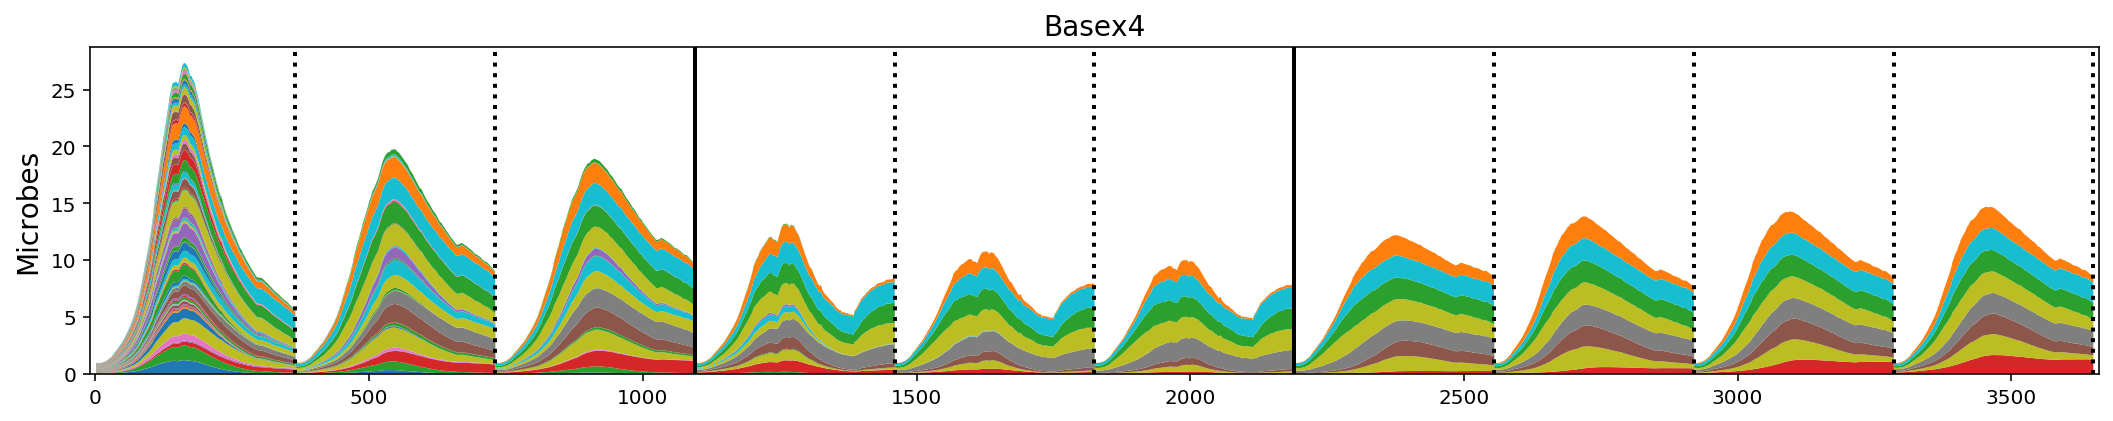

In [10]:
fig = plt.figure(figsize=(18,3))

ax1 = fig.add_subplot(111)
plt.ylabel('Microbes',size=14)
plt.xlim(-10,365*10+10)
plt.title('Basex4',size=14)  

plt.stackplot(range(1,365*10+1),mic_basex4.iloc[:,1:])

for i in range(10):
    if (i == 2) | (i==5):
        plt.axvline(x=365*(i+1),color='k',linestyle='-',lw=2)
    else:
        plt.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)

## basex10

In [11]:
mic_basex10 = pd.read_csv('Mic_basex10_20201.csv',index_col=0)
mic_basex10.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Tax1,109.0,105.030045,102.687996,100.008510,98.168884,97.030570,96.55217,97.46144,99.173515,101.274100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax2,102.0,100.581340,100.193245,99.839615,99.539474,98.306915,98.10828,97.94813,97.848340,97.780230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax3,114.0,110.605100,107.994900,105.119736,103.206100,102.905630,103.24941,103.03032,104.570570,106.379730,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax4,95.0,94.151146,93.486650,93.024635,90.932740,91.067010,91.48466,92.11806,93.096830,94.259056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax5,117.0,116.050090,115.208110,114.489845,113.967180,113.620186,113.45170,113.41825,113.602580,113.895195,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
mic_basex10 = mic_basex10/10000
mic_basex10.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Tax1,0.0109,0.010503,0.010269,0.010001,0.009817,0.009703,0.009655,0.009746,0.009917,0.010127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax2,0.0102,0.010058,0.010019,0.009984,0.009954,0.009831,0.009811,0.009795,0.009785,0.009778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax3,0.0114,0.011061,0.010799,0.010512,0.010321,0.010291,0.010325,0.010303,0.010457,0.010638,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax4,0.0095,0.009415,0.009349,0.009302,0.009093,0.009107,0.009148,0.009212,0.009310,0.009426,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax5,0.0117,0.011605,0.011521,0.011449,0.011397,0.011362,0.011345,0.011342,0.011360,0.011390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


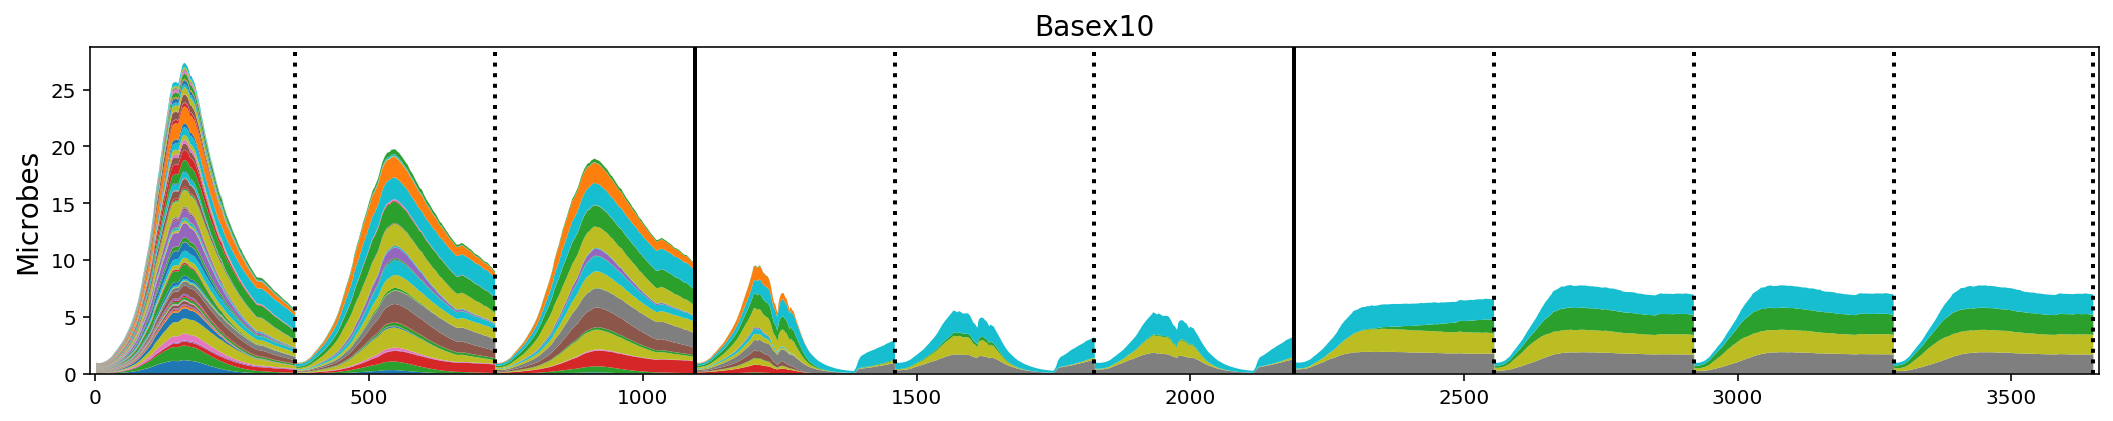

In [13]:
fig = plt.figure(figsize=(18,3))

ax1 = fig.add_subplot(111)
plt.ylabel('Microbes',size=14)
plt.xlim(-10,365*10+10)
plt.title('Basex10',size=14)  

plt.stackplot(range(1,365*10+1),mic_basex10.iloc[:,1:])

for i in range(10):
    if (i == 2) | (i==5):
        plt.axvline(x=365*(i+1),color='k',linestyle='-',lw=2)
    else:
        plt.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)

## basex10_dis

In [14]:
mic_basex10_dis = pd.read_csv('Mic_basex10_dis_20201.csv',index_col=0)
mic_basex10_dis.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Tax1,109.0,105.030045,102.687996,100.008510,98.168884,97.030570,96.55217,97.46144,99.173515,101.274100,...,67.789444,66.69111,65.60789,64.521484,63.46349,62.467144,60.36512,57.863907,56.874023,55.488625
Tax2,102.0,100.581340,100.193245,99.839615,99.539474,98.306915,98.10828,97.94813,97.848340,97.780230,...,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
Tax3,114.0,110.605100,107.994900,105.119736,103.206100,102.905630,103.24941,103.03032,104.570570,106.379730,...,273.975900,265.60770,257.45026,250.419740,242.51204,234.903440,227.47224,219.807080,212.110100,204.746540
Tax4,95.0,94.151146,93.486650,93.024635,90.932740,91.067010,91.48466,92.11806,93.096830,94.259056,...,990.480960,985.03490,981.26130,977.349240,971.23755,966.349800,961.26074,955.645100,949.604430,941.560100
Tax5,117.0,116.050090,115.208110,114.489845,113.967180,113.620186,113.45170,113.41825,113.602580,113.895195,...,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000


In [15]:
mic_basex10_dis = mic_basex10_dis/10000
mic_basex10_dis.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Tax1,0.0109,0.010503,0.010269,0.010001,0.009817,0.009703,0.009655,0.009746,0.009917,0.010127,...,0.006779,0.006669,0.006561,0.006452,0.006346,0.006247,0.006037,0.005786,0.005687,0.005549
Tax2,0.0102,0.010058,0.010019,0.009984,0.009954,0.009831,0.009811,0.009795,0.009785,0.009778,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax3,0.0114,0.011061,0.010799,0.010512,0.010321,0.010291,0.010325,0.010303,0.010457,0.010638,...,0.027398,0.026561,0.025745,0.025042,0.024251,0.023490,0.022747,0.021981,0.021211,0.020475
Tax4,0.0095,0.009415,0.009349,0.009302,0.009093,0.009107,0.009148,0.009212,0.009310,0.009426,...,0.099048,0.098503,0.098126,0.097735,0.097124,0.096635,0.096126,0.095565,0.094960,0.094156
Tax5,0.0117,0.011605,0.011521,0.011449,0.011397,0.011362,0.011345,0.011342,0.011360,0.011390,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


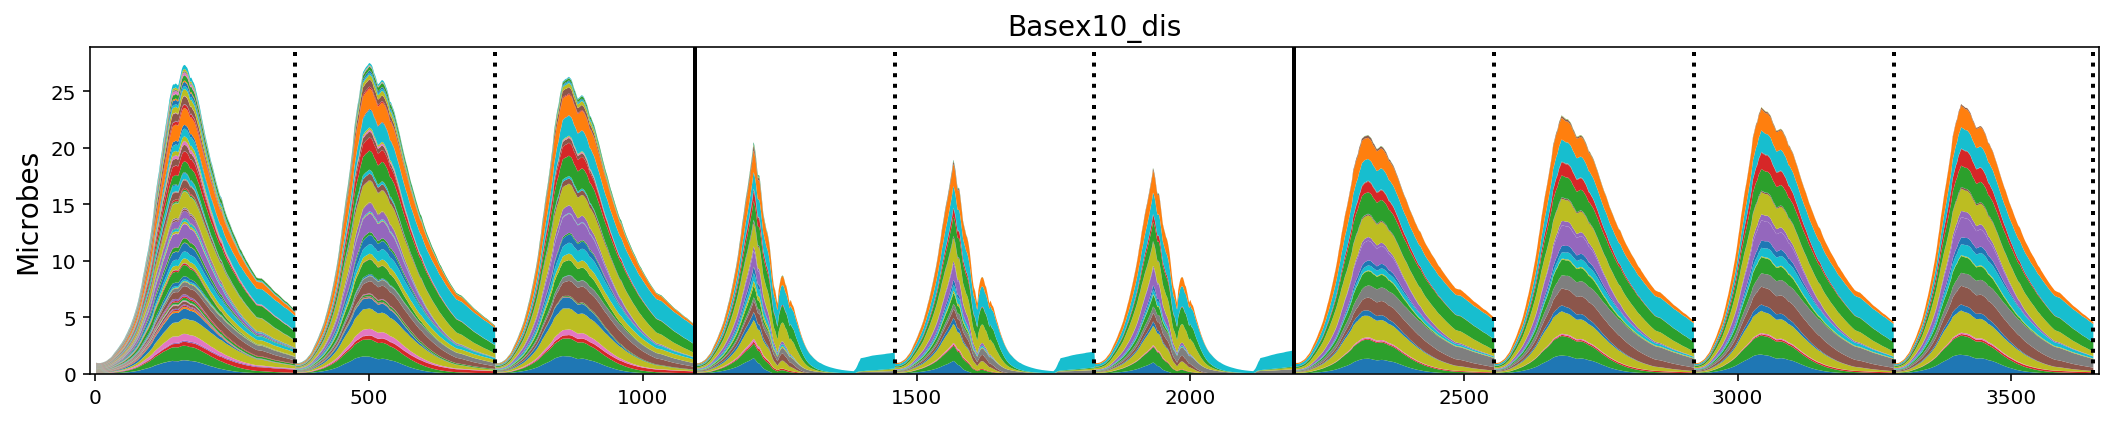

In [16]:
fig = plt.figure(figsize=(18,3))

ax1 = fig.add_subplot(111)
plt.ylabel('Microbes',size=14)
plt.xlim(-10,365*10+10)
plt.title('Basex10_dis',size=14)  

plt.stackplot(range(1,365*10+1),mic_basex10_dis.iloc[:,1:])

for i in range(10):
    if (i == 2) | (i==5):
        plt.axvline(x=365*(i+1),color='k',linestyle='-',lw=2)
    else:
        plt.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)

## basex15

In [17]:
mic_basex15 = pd.read_csv('Mic_basex15_20201.csv',index_col=0)
mic_basex15.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Tax1,109.0,105.030045,102.687996,100.008510,98.168884,97.030570,96.55217,97.46144,99.173515,101.274100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax2,102.0,100.581340,100.193245,99.839615,99.539474,98.306915,98.10828,97.94813,97.848340,97.780230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax3,114.0,110.605100,107.994900,105.119736,103.206100,102.905630,103.24941,103.03032,104.570570,106.379730,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax4,95.0,94.151146,93.486650,93.024635,90.932740,91.067010,91.48466,92.11806,93.096830,94.259056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax5,117.0,116.050090,115.208110,114.489845,113.967180,113.620186,113.45170,113.41825,113.602580,113.895195,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
mic_basex15 = mic_basex15/10000
mic_basex15.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Tax1,0.0109,0.010503,0.010269,0.010001,0.009817,0.009703,0.009655,0.009746,0.009917,0.010127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax2,0.0102,0.010058,0.010019,0.009984,0.009954,0.009831,0.009811,0.009795,0.009785,0.009778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax3,0.0114,0.011061,0.010799,0.010512,0.010321,0.010291,0.010325,0.010303,0.010457,0.010638,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax4,0.0095,0.009415,0.009349,0.009302,0.009093,0.009107,0.009148,0.009212,0.009310,0.009426,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax5,0.0117,0.011605,0.011521,0.011449,0.011397,0.011362,0.011345,0.011342,0.011360,0.011390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


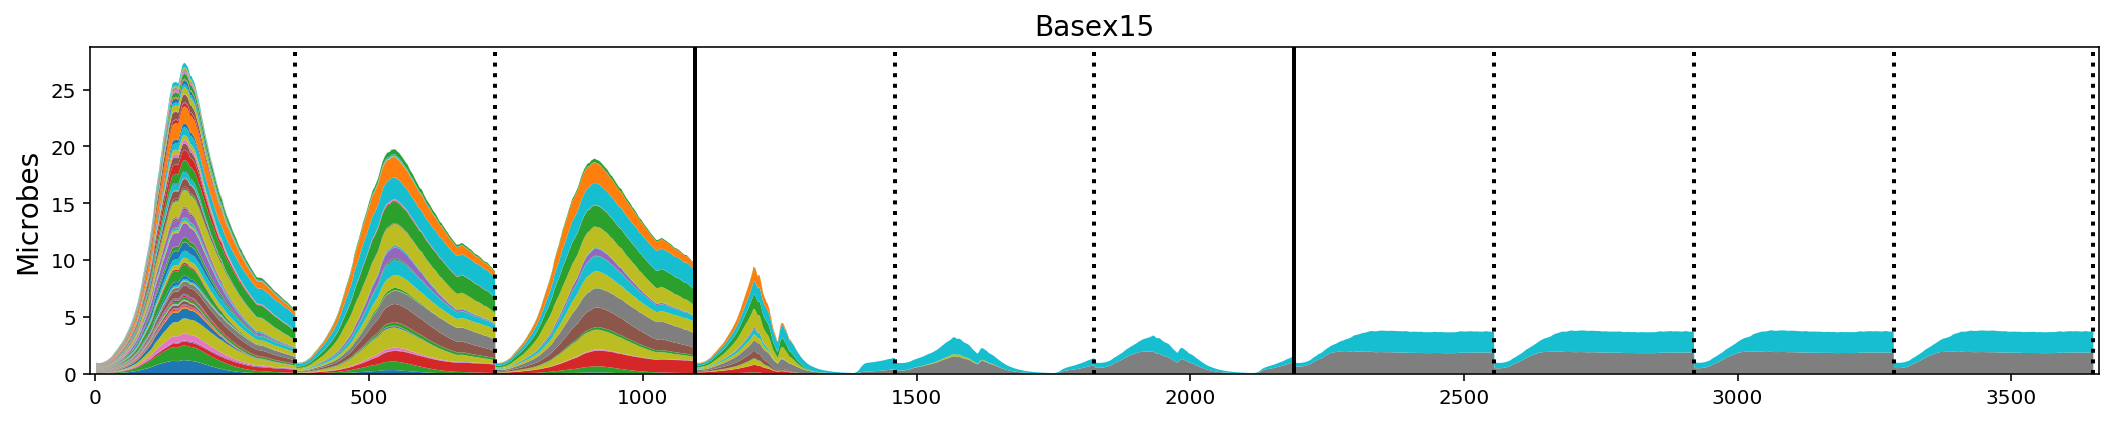

In [19]:
fig = plt.figure(figsize=(18,3))

ax1 = fig.add_subplot(111)
plt.ylabel('Microbes',size=14)
plt.xlim(-10,365*10+10)
plt.title('Basex15',size=14)  

plt.stackplot(range(1,365*10+1),mic_basex15.iloc[:,1:])

for i in range(10):
    if (i == 2) | (i==5):
        plt.axvline(x=365*(i+1),color='k',linestyle='-',lw=2)
    else:
        plt.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)

## basex15_dis

In [20]:
mic_basex15_dis = pd.read_csv('Mic_basex15_dis_20201.csv',index_col=0)
mic_basex15_dis.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Tax1,109.0,105.030045,102.687996,100.008510,98.168884,97.030570,96.55217,97.46144,99.173515,101.274100,...,73.91094,71.77829,70.63022,69.03539,67.51077,66.303696,64.34936,63.265957,62.22038,60.447956
Tax2,102.0,100.581340,100.193245,99.839615,99.539474,98.306915,98.10828,97.94813,97.848340,97.780230,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000
Tax3,114.0,110.605100,107.994900,105.119736,103.206100,102.905630,103.24941,103.03032,104.570570,106.379730,...,271.01144,263.21216,254.90048,247.68933,240.04532,232.540910,224.87240,216.233410,208.86443,202.231890
Tax4,95.0,94.151146,93.486650,93.024635,90.932740,91.067010,91.48466,92.11806,93.096830,94.259056,...,242.34804,240.11539,237.58942,235.35991,234.43060,233.581680,231.15855,230.144900,228.24179,225.600200
Tax5,117.0,116.050090,115.208110,114.489845,113.967180,113.620186,113.45170,113.41825,113.602580,113.895195,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000


In [21]:
mic_basex15_dis = mic_basex15_dis/10000
mic_basex15_dis.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Tax1,0.0109,0.010503,0.010269,0.010001,0.009817,0.009703,0.009655,0.009746,0.009917,0.010127,...,0.007391,0.007178,0.007063,0.006904,0.006751,0.006630,0.006435,0.006327,0.006222,0.006045
Tax2,0.0102,0.010058,0.010019,0.009984,0.009954,0.009831,0.009811,0.009795,0.009785,0.009778,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax3,0.0114,0.011061,0.010799,0.010512,0.010321,0.010291,0.010325,0.010303,0.010457,0.010638,...,0.027101,0.026321,0.025490,0.024769,0.024005,0.023254,0.022487,0.021623,0.020886,0.020223
Tax4,0.0095,0.009415,0.009349,0.009302,0.009093,0.009107,0.009148,0.009212,0.009310,0.009426,...,0.024235,0.024012,0.023759,0.023536,0.023443,0.023358,0.023116,0.023014,0.022824,0.022560
Tax5,0.0117,0.011605,0.011521,0.011449,0.011397,0.011362,0.011345,0.011342,0.011360,0.011390,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


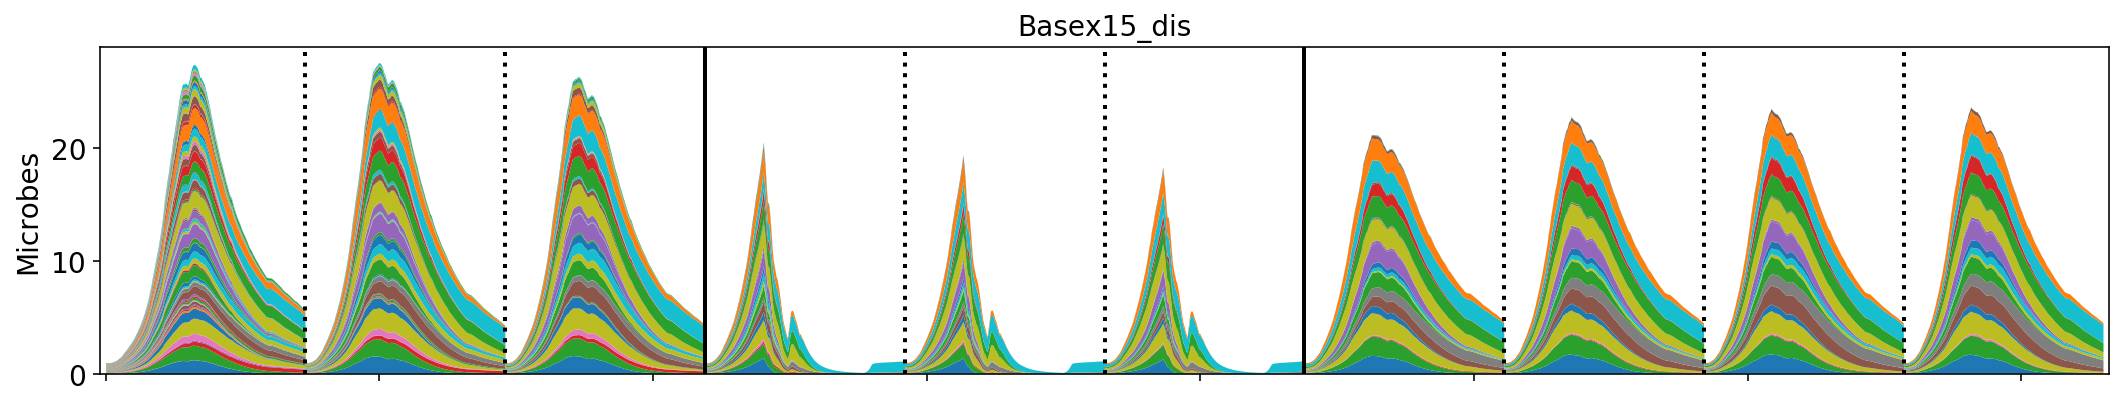

In [22]:
fig = plt.figure(figsize=(18,3))

ax1 = fig.add_subplot(111)

plt.tick_params(axis='both',labelbottom=False,labelsize=14)
plt.ylabel('Microbes',size=14)
plt.xlim(-10,365*10+10)
plt.title('Basex15_dis',size=14)  

plt.stackplot(range(1,365*10+1),mic_basex15_dis.iloc[:,1:])

for i in range(9):
    if (i == 2) | (i==5):
        plt.axvline(x=365*(i+1),color='k',linestyle='-',lw=2)
    else:
        plt.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)

## basex20

In [23]:
mic_basex20 = pd.read_csv('Mic_basex20_20201.csv',index_col=0)
mic_basex20.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Tax1,109.0,105.030045,102.687996,100.008510,98.168884,97.030570,96.55217,97.46144,99.173515,101.274100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax2,102.0,100.581340,100.193245,99.839615,99.539474,98.306915,98.10828,97.94813,97.848340,97.780230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax3,114.0,110.605100,107.994900,105.119736,103.206100,102.905630,103.24941,103.03032,104.570570,106.379730,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax4,95.0,94.151146,93.486650,93.024635,90.932740,91.067010,91.48466,92.11806,93.096830,94.259056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax5,117.0,116.050090,115.208110,114.489845,113.967180,113.620186,113.45170,113.41825,113.602580,113.895195,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
mic_basex20 = mic_basex20/10000
mic_basex20.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Tax1,0.0109,0.010503,0.010269,0.010001,0.009817,0.009703,0.009655,0.009746,0.009917,0.010127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax2,0.0102,0.010058,0.010019,0.009984,0.009954,0.009831,0.009811,0.009795,0.009785,0.009778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax3,0.0114,0.011061,0.010799,0.010512,0.010321,0.010291,0.010325,0.010303,0.010457,0.010638,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax4,0.0095,0.009415,0.009349,0.009302,0.009093,0.009107,0.009148,0.009212,0.009310,0.009426,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax5,0.0117,0.011605,0.011521,0.011449,0.011397,0.011362,0.011345,0.011342,0.011360,0.011390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


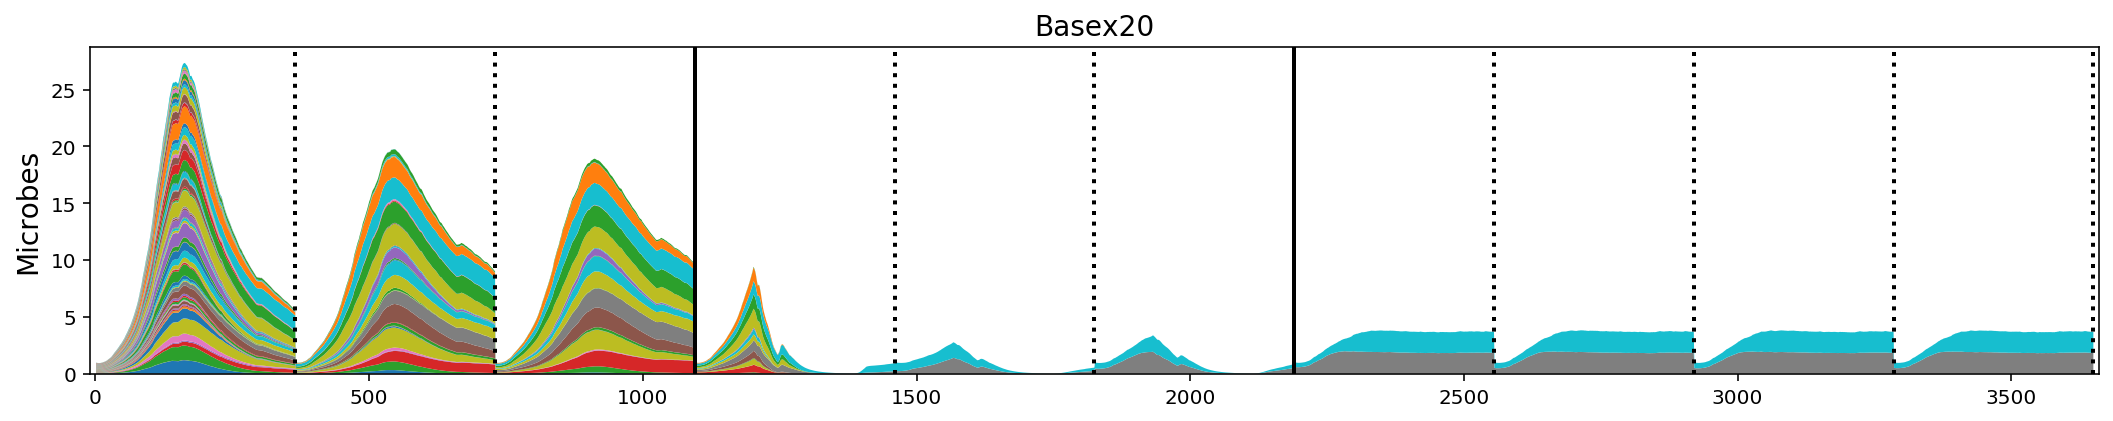

In [25]:
fig = plt.figure(figsize=(18,3))

ax1 = fig.add_subplot(111)
plt.ylabel('Microbes',size=14)
plt.xlim(-10,365*10+10)
plt.title('Basex20',size=14)  

plt.stackplot(range(1,365*10+1),mic_basex20.iloc[:,1:])

for i in range(10):
    if (i == 2) | (i==5):
        plt.axvline(x=365*(i+1),color='k',linestyle='-',lw=2)
    else:
        plt.axvline(x=365*(i+1),color='k',linestyle=':',lw=2)

## Re-assembled Dataset of Year 3, 6, & 9

#### Visualization  1

In [26]:
index_3   = [i for i in range(365*2+1,365*3+1)]
index_6   = [i for i in range(365*5+1,365*6+1)]
index_9   = [i for i in range(365*8+1,365*9+1)]
index_369 = index_3 + index_6 + index_9

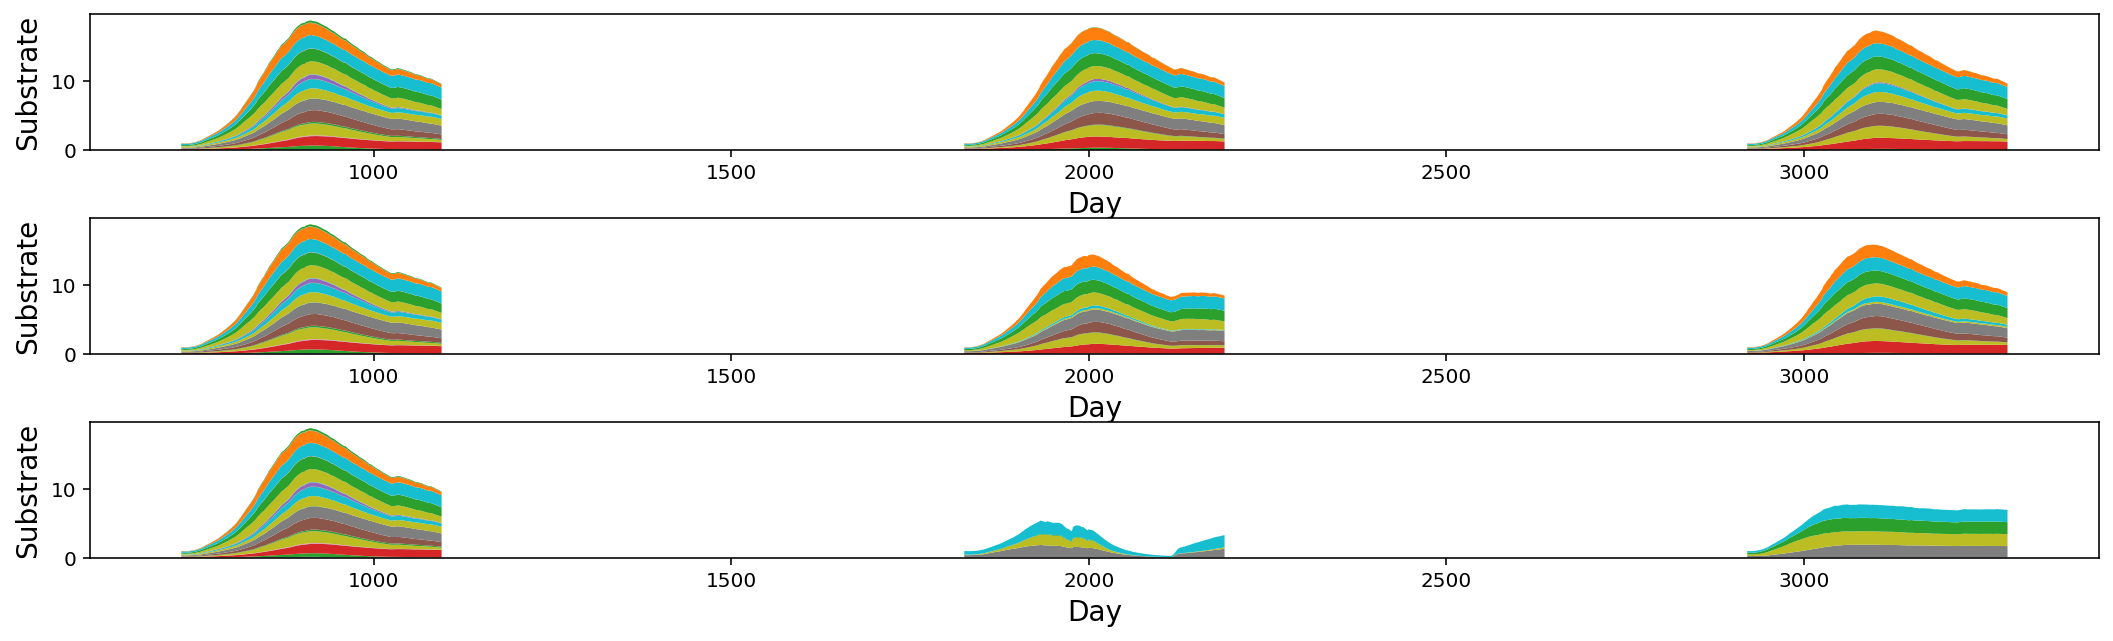

In [27]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(18,5))


ax1.stackplot(index_3,mic_base.iloc[:,index_3])
ax1.stackplot(index_6,mic_base.iloc[:,index_6])
ax1.stackplot(index_9,mic_base.iloc[:,index_9])
ax1.set_xlabel('Day',size=14)
ax1.set_ylabel('Substrate',size=14)

ax2.stackplot(index_3,mic_basex2.iloc[:,index_3])
ax2.stackplot(index_6,mic_basex2.iloc[:,index_6])
ax2.stackplot(index_9,mic_basex2.iloc[:,index_9])
ax2.set_xlabel('Day',size=14)
ax2.set_ylabel('Substrate',size=14)

ax3.stackplot(index_3,mic_basex10.iloc[:,index_3])
ax3.stackplot(index_6,mic_basex10.iloc[:,index_6])
ax3.stackplot(index_9,mic_basex10.iloc[:,index_9])
ax3.set_xlabel('Day',size=14)
ax3.set_ylabel('Substrate',size=14)


plt.subplots_adjust(hspace=0.5)

plt.show()

#### Visualization 2

**Make the 3 years stick together**

In [28]:
mic_base369    = mic_base.iloc[:,index_369]
mic_basex2369  = mic_basex2.iloc[:,index_369]
mic_basex4369  = mic_basex4.iloc[:,index_369]
mic_basex10369 = mic_basex10.iloc[:,index_369]

mic_basex10_dis369 = mic_basex10_dis.iloc[:,index_369] # cumulative initialization

mic_basex15369 = mic_basex15.iloc[:,index_369]
mic_basex20369 = mic_basex20.iloc[:,index_369]

mic_base369.columns = mic_basex2369.columns = mic_basex10369.columns = \
mic_basex10_dis369.columns = mic_basex15369.columns = mic_basex20369.columns = \
[i for i in range(1,365*3+1)]

In [29]:
mic_base369.head()

,1,2,3,4,5,6,7,8,9,10,...,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095
Tax1,0.001167,0.001141,0.001120,0.001108,0.001101,0.001101,0.001105,0.001115,0.001129,0.001151,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax3,0.004851,0.004734,0.004643,0.004587,0.004557,0.004550,0.004557,0.004593,0.004636,0.004713,...,0.014191,0.013965,0.013640,0.013367,0.013155,0.012959,0.012657,0.012249,0.012040,0.011838
Tax4,0.082457,0.081739,0.081149,0.080748,0.080216,0.080036,0.080068,0.080291,0.080600,0.081128,...,1.241394,1.237841,1.233583,1.230228,1.226923,1.224662,1.220264,1.216332,1.212306,1.210141
Tax5,0.004067,0.004038,0.004014,0.003996,0.003984,0.003977,0.003974,0.003977,0.003982,0.003994,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


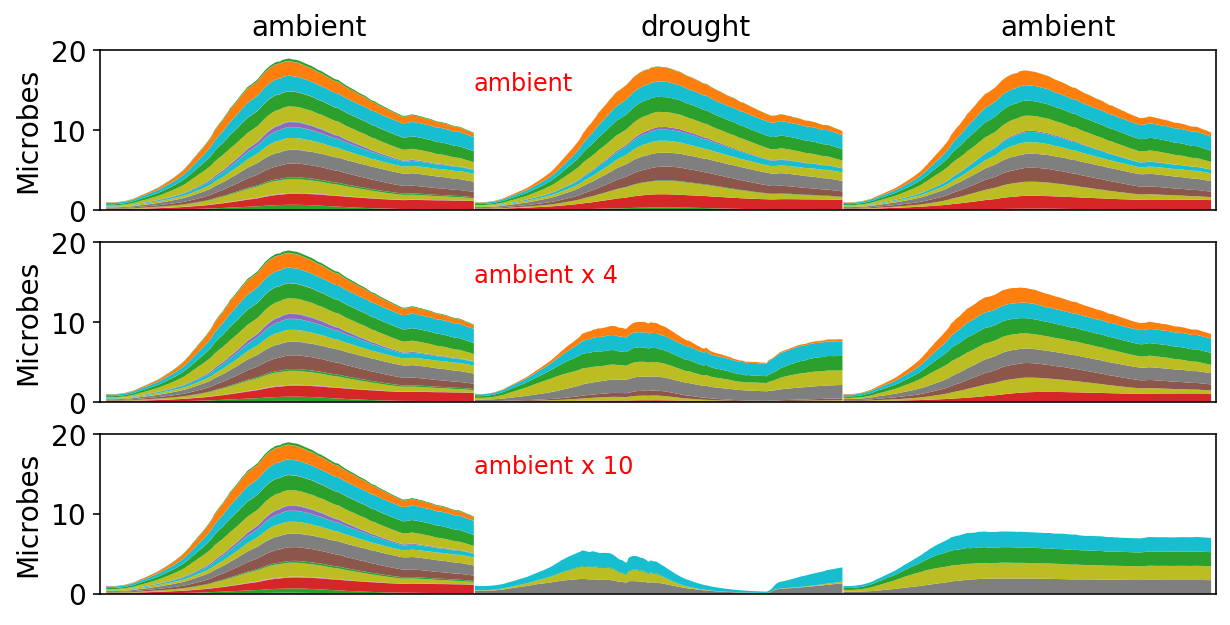

In [30]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10,5))


ax1.set_xlim(-5,365*3+5)
ax1.set_ylim(-0,20)
#ax1.set_xlabel('Day',size=14)
ax1.set_ylabel('Microbes',size=14)
ax1.tick_params(bottom=False,labelbottom=False)    
ax1.yaxis.set_tick_params(labelsize=14)
ax1.text(365,15.0,'ambient',fontsize=12,c='r') #,ha='center', va='center')

ax1.stackplot(range(1,      365*1+1),mic_base369.iloc[:,0:365*1])
ax1.stackplot(range(365*1+1,365*2+1),mic_base369.iloc[:,365*1:365*2])
ax1.stackplot(range(365*2+1,365*3+1),mic_base369.iloc[:,365*2:365*3])


ax2.set_xlim(-5,365*3+5)
ax2.set_ylim(-0,20)
#ax2.set_xlabel('Day',size=14)
ax2.set_ylabel('Microbes',size=14)
ax2.tick_params(bottom=False,labelbottom=False)    
ax2.yaxis.set_tick_params(labelsize=14)
ax2.text(365,15.0,'ambient x 4',fontsize=12,c='r') #,ha='center', va='center')

ax2.stackplot(range(1,      365*1+1),mic_basex4369.iloc[:,0:365*1])
ax2.stackplot(range(365*1+1,365*2+1),mic_basex4369.iloc[:,365*1:365*2])
ax2.stackplot(range(365*2+1,365*3+1),mic_basex4369.iloc[:,365*2:365*3])


ax3.set_xlim(-5,365*3+5)
ax3.set_ylim(-0,20)
#ax3.set_xlabel('Day',size=14)
ax3.set_ylabel('Microbes',size=14)
ax3.tick_params(bottom=False,labelbottom=False)    
ax3.yaxis.set_tick_params(labelsize=14)
ax3.text(365,15.0,'ambient x 10',fontsize=12,c='r') #,ha='center', va='center')

ax3.stackplot(range(1,      365*1+1),mic_basex10369.iloc[:,0:365*1])
ax3.stackplot(range(365*1+1,365*2+1),mic_basex10369.iloc[:,365*1:365*2])
ax3.stackplot(range(365*2+1,365*3+1),mic_basex10369.iloc[:,365*2:365*3])


# ax4.stackplot(range(1,      365*1+1),mic_basex10_dis369.iloc[:,0:365*1])
# ax4.stackplot(range(365*1+1,365*2+1),mic_basex10_dis369.iloc[:,365*1:365*2])
# ax4.stackplot(range(365*2+1,365*3+1),mic_basex10_dis369.iloc[:,365*2:365*3])
# ax4.set_xlabel('Day',size=14)
# ax4.set_ylabel('Substrate',size=14)


plt.figtext(0.23,0.9,'ambient',fontsize=14,weight='normal',c='k')
plt.figtext(0.50,0.9,'drought',fontsize=14,weight='normal',c='k')
plt.figtext(0.75,0.9,'ambient',fontsize=14,weight='normal',c='k')

plt.subplots_adjust(hspace=0.2)

plt.show()